In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import levene
%matplotlib notebook

In [2]:
data1 = pd.read_excel("C题数据.xlsx", "datat1").drop(labels=50).drop(labels=["组号", "编号"], axis=1)
data2 = pd.read_excel("C题数据.xlsx", "data2").drop(labels=[0, 1, 2, 8]).drop(labels=["Unnamed: 0", "Unnamed: 1"], axis=1)
data2.index = [20, 25, 30, 35, 40]
data3 = pd.read_excel("C题数据.xlsx", "data3")
data1

,厚度mm,孔隙率（%）,压缩回弹性率（%）,过滤阻力Pa,过滤效率（%）,透气性 mm/s,插层率（%）
0,1.715,93.52,77.84,8.130,4.967,777.10,NaN
1,2.810,96.28,83.20,7.533,19.967,1019.67,36.44
2,1.830,93.93,86.23,10.470,1.933,795.57,NaN
3,2.910,96.41,86.65,7.200,24.967,968.63,24.74
4,1.890,94.12,82.12,11.870,4.300,564.93,NaN
5,3.425,96.95,94.33,10.133,34.600,643.40,31.45
6,2.095,94.70,83.01,13.900,11.767,474.50,NaN
7,3.400,96.93,82.88,10.600,33.900,603.17,19.37
8,2.235,95.03,86.04,19.230,20.767,347.23,NaN
9,3.845,97.30,75.97,15.700,54.500,405.83,31.19


In [6]:
# 第一问
yv = data1.values
yi = np.delete(yv[[i for i in range(0, 50, 2)]], -1, axis=1)
yip = np.delete(yv[[i for i in range(1, 50, 2)]], -1, axis=1)
e = (yip - yi) / yi
e = np.insert(e, 6, data1["插层率（%）"].values[~np.isnan(data1["插层率（%）"].values)],axis=1)
dfe = pd.DataFrame(e, columns=data1.columns)
dfe.columns = ["厚度相对变化量", "孔隙率相对变化量", "压缩回弹性率相对变化量", "过滤阻力相对变化量", "过滤效率相对变化量", "透气性相对变化量", "插层率（%）"]
dfe

,厚度相对变化量,孔隙率相对变化量,压缩回弹性率相对变化量,过滤阻力相对变化量,过滤效率相对变化量,透气性相对变化量,插层率（%）
0,0.638484,0.029512,0.068859,-0.073432,3.019932,0.312148,36.44
1,0.590164,0.026403,0.004871,-0.312321,11.916192,0.217530,24.74
2,0.812169,0.030068,0.148685,-0.146335,7.046512,0.138902,31.45
3,0.622912,0.023548,-0.001566,-0.237410,1.880938,0.271170,19.37
4,0.720358,0.023887,-0.117039,-0.183567,1.624356,0.168764,31.19
5,0.449640,0.030540,-0.001700,-0.168875,14.233699,-0.037421,16.53
6,0.612903,0.034446,-0.080899,-0.007021,3.184353,0.346190,19.73
7,1.041935,0.041689,-0.002012,-0.228687,1.336823,0.252107,21.72
8,0.467363,0.022081,0.230200,-0.211804,0.348575,0.226537,18.62
9,0.489071,0.023848,0.177772,-0.220836,0.395062,0.174794,13.87


<IPython.core.display.Javascript object>


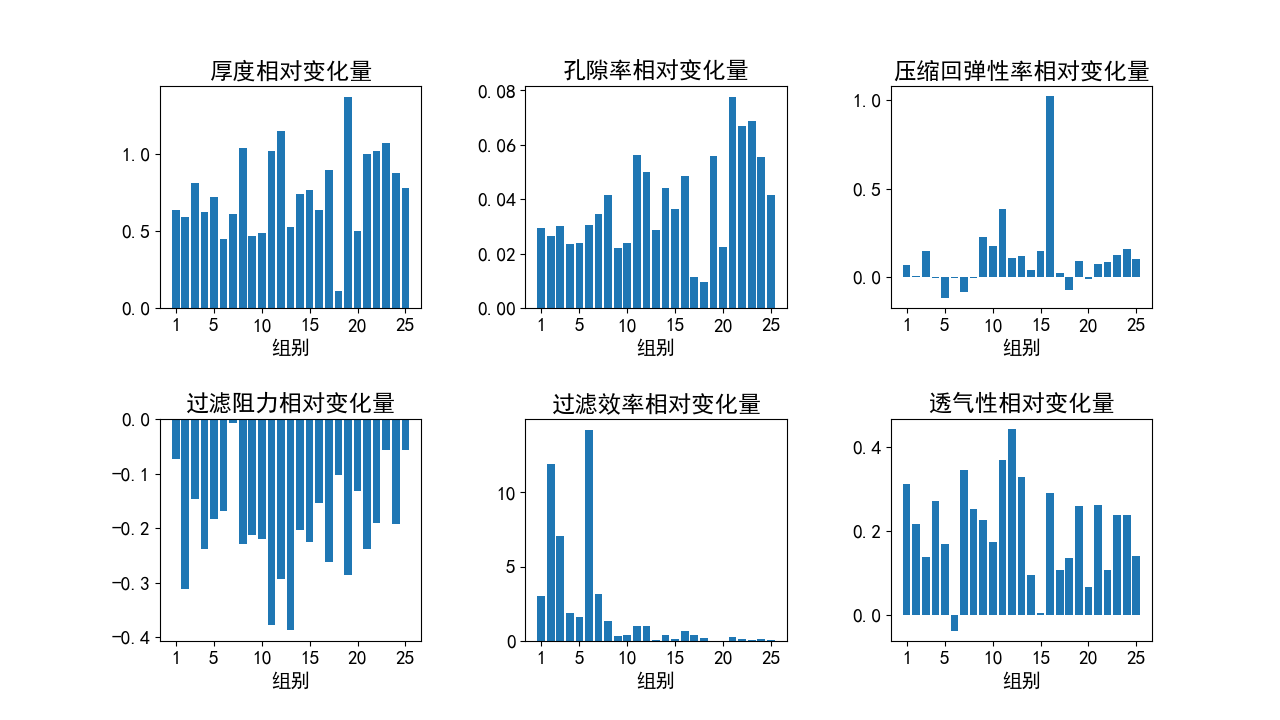

In [8]:
plt.rc('font', size=14)
plt.rc('font', family="SimHei")
plt.rc('axes', unicode_minus=False)
plt.rc('figure',figsize=(12.8, 7.2))
plt.subplots_adjust(wspace=0.4, hspace=0.5)
i = 231
for tar in dfe.columns[:-1]:
    plt.subplot(i)
    plt.bar(np.arange(1, 26), dfe[tar].values)
    plt.xticks(np.array([1, 5, 10, 15, 20 ,25]))
    plt.xlabel("组别")
    plt.title(tar)
    i += 1
plt.show()
plt.savefig("./相对变化量直方图.png")


In [9]:
with open("第一次方差分析结果.txt","w") as f:
    for tar in data1.columns[:-1]:
        x = np.tile(np.array([0, 1]), 25)
        y = data1[tar].values
        stat, p = levene(y[[i for i in range(0, 25, 2)]],
                         y[[i for i in range(1, 25, 2)]])
        if p > 0.05:
            f.write("对{0}进行检验得到的显著性为{1}，认为本次方差分析是齐的，可以进行方差分析\n".format(tar, p.round(4)))
            d = {'x': x, 'y': y}
            model1 = sm.formula.ols("y ~ C(x)", data=d).fit()
            s = sm.stats.anova_lm(model1)
            f.write(str(s)+'\n')
            f.write('='*80+'\n')
